# QBio REU Intermediate Python

## Week 4: Pandas

Prepared by John Russell (johnrussell@g.harvard.edu)

July 2020

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#These are some matplot lib configurations that I like to use. 
mpl.rc("text", usetex=True) #if you have Latex set this to true and matplotlib will render labels in latex
mpl.rc("font", family = "serif") #Serif font in matplotlib
mpl.rc("figure",figsize=(9,6)) #Increase default figure size
%config InlineBackend.figure_format = 'retina' #If you have a high res display, render the plots more nicely
mpl.style.use('dark_background') #Use a dark background for matplotlib figures if youre using dark theme
plt.rcParams.update({"figure.facecolor": "111111",
                    "savefig.facecolor": "212121"})

### Introduction

Pandas builds on top of numpy for tabular data, essentially, anything that you could have in a spreadsheet. The core of pandas is the `DataFrame` which combines many of the useful features of numpy arrays and python dictionaries.

Motivation: Like it or not, a majority of the time it takes to do data analysis or data science is data cleaning -- getting the data you have into a nice, usable form. Pandas is *excellent* for this process even when the data is non-numeric (and numpy would be annoying).

I'm going to roughly follow the [PDSH Pandas Chapter](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#3.-Data-Manipulation-with-Pandas) which is really good. The documentation is also good, check out the [User Guide](https://pandas.pydata.org/docs/user_guide/index.html). 



In [211]:
import pandas as pd

### Series

In [212]:
s1 = pd.Series([0.3, 1, 1.6, 2.1, 3.3])
s1

0    0.3
1    1.0
2    1.6
3    2.1
4    3.3
dtype: float64

Indexing with a simple series is much like arrays/lists but it is more flexible.

> The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values. (PDSH)

In [216]:
s1[2:4]

2    1.6
3    2.1
dtype: float64

In [217]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [218]:
s2 = pd.Series([0.3, 1, 1.6, 2.1, 3.3],
               index=['a', 'b', 'c', 'd', 'e'])

In [219]:
s2

a    0.3
b    1.0
c    1.6
d    2.1
e    3.3
dtype: float64

Now `s2` feels more like a dictionary.

In [221]:
s2['c':'e']

c    1.6
d    2.1
e    3.3
dtype: float64

The index does not have to be sequential/contiguous.

In [222]:
s3 = pd.Series([0.3, 1, 1.6, 2.1, 3.3],
               index=[2, 4, 7, 8, 10]) 

In [223]:
s3

2     0.3
4     1.0
7     1.6
8     2.1
10    3.3
dtype: float64

In [224]:
s3[10]

3.3

Other ways to initialize Series

In [225]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [226]:
population['Texas':'Florida']

Texas       26448193
New York    19651127
Florida     19552860
dtype: int64

### DataFrames

This is really the bread and butter of pandas. Dataframes are essentially sets of series that share an index.

In [227]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [228]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [229]:
states['area'] #Dictionary style indexing

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [230]:
states.area #Attribute style access 
            #only works if column names are strings and dont conflict with dataframe attributes

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [231]:
states['density'] = states['population']/states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


### Dataframes as specialized arrays

#### Indexing

In [232]:
#can almost always get values out of dataframes into arrays
states.values

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

We know how to index and slice arrays

In [233]:
states.values[1:4,1]

array([695662., 141297., 170312.])

But how do we do such things with dataframes directly?

In [234]:
states.iloc[1:4,1]

Texas       695662
New York    141297
Florida     170312
Name: area, dtype: int64

`iloc` accesses the underlying array but preserves the index. 

In [236]:
states.loc['Texas':'Florida', 'area']

Texas       695662
New York    141297
Florida     170312
Name: area, dtype: int64

So `loc` uses the index and column labels to access data. A little more typing but I would suggest that it is often more clear what you are doing. `loc` also enables one to use many of numpy's fancy indexing tricks.

In [237]:
states.loc[states['density']>100, ['population', 'density']]

,population,density
New York,19651127,139.076746
Florida,19552860,114.806121


#### Mathematical Operations

All numpy universal functions will work on dataframes and preserve the index. Note that even though we used a numpy function, it returns a pandas Series. The scipy devs are champs.

In [238]:
np.sqrt(states['area'])

California    651.127484
Texas         834.063547
New York      375.894932
Florida       412.688745
Illinois      387.291880
Name: area, dtype: float64

### Merging Datasets

I find myself using pandas for this all the time. It can be a little tricky but just remember to always google when you get stuck. I'll go through the main things but leave the finer details to you to work out on your own.

*** Side Note about datasets ***
Governments are decent at providing datasets but sometimes its tricky to navigate their website. Also lately they've been taking things down especially related to e.g. climate change which is infuriating. Some good agencies if you're interesting in these sorts of things are the census bureau, the energy information administration, NASA, to name a few that I have used. For these examples I got data from the census.

[State populations](https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html) 

[State Financial Data](https://data.census.gov/cedsci/) seach for "GS00SG01".

In [257]:
census = pd.read_excel('../nst-est2019-01.xlsx', header=1)
# you may get an error if you try to load this saying you need to install xlrd or openpyxl.
# in a terminal run "pip install ..."

In [242]:
census.head(10)

,Region,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538.0,308758105.0,309321666.0,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Northeast,55317240.0,55318443.0,55380134.0,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
2,Midwest,66927001.0,66929725.0,66974416.0,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
3,South,114555744.0,114563030.0,114866680.0,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
4,West,71945553.0,71946907.0,72100436.0,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
5,.Alabama,4779736.0,4780125.0,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
6,.Alaska,710231.0,710249.0,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
7,.Arizona,6392017.0,6392288.0,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
8,.Arkansas,2915918.0,2916031.0,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
9,.California,37253956.0,37254519.0,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [244]:
census.tail(10)

,Region,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
53,.West Virginia,1852994.0,1853018.0,1854239.0,1856301.0,1856872.0,1853914.0,1849489.0,1842050.0,1831023.0,1817004.0,1804291.0,1792147.0
54,.Wisconsin,5686986.0,5687285.0,5690475.0,5705288.0,5719960.0,5736754.0,5751525.0,5760940.0,5772628.0,5790186.0,5807406.0,5822434.0
55,.Wyoming,563626.0,563775.0,564487.0,567299.0,576305.0,582122.0,582531.0,585613.0,584215.0,578931.0,577601.0,578759.0
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Puerto Rico,3725789.0,3726157.0,3721525.0,3678732.0,3634488.0,3593077.0,3534874.0,3473232.0,3406672.0,3325286.0,3193354.0,3193694.0
58,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Release Date: December 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
#Drop the garbage rows from the bottom
census = census.iloc[5:56]
# Remove . from state names
census['Region'] = census['Region'].str.strip('.')
#Keep Region, Census, 2018
census.drop(labels=['Estimates Base', 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], axis=1, inplace=True)
census

,Region,Census,2018,2019
5,Alabama,4779736.0,4887681.0,4903185.0
6,Alaska,710231.0,735139.0,731545.0
7,Arizona,6392017.0,7158024.0,7278717.0
8,Arkansas,2915918.0,3009733.0,3017804.0
9,California,37253956.0,39461588.0,39512223.0
10,Colorado,5029196.0,5691287.0,5758736.0
11,Connecticut,3574097.0,3571520.0,3565287.0
12,Delaware,897934.0,965479.0,973764.0
13,District of Columbia,601723.0,701547.0,705749.0
14,Florida,18801310.0,21244317.0,21477737.0


In [259]:
finance = pd.read_csv('../GOVSTIMESERIES.GS00SG01_data_with_overlays_2020-07-14T144014.csv', header=1)

In [260]:
finance

,Geographic Area Name,Survey Component,Year,Aggregate Description,Type of Government,Amount,Amount Formatted,id,Type of Government.1,Aggregate Description.1,Survey Component.1,Geo Footnote
0,Alabama,Annual Survey of State Government Finance,2012,Total Revenue,State,29652729.0,"29,652,729",0400000US01,2,SF0001,2,NaN
1,Alabama,Annual Survey of State Government Finance,2013,Total Revenue,State,30469040.0,"30,469,040",0400000US01,2,SF0001,2,NaN
2,Alabama,Annual Survey of State Government Finance,2014,Total Revenue,State,29321403.0,"29,321,403",0400000US01,2,SF0001,2,NaN
3,Alabama,Annual Survey of State Government Finance,2015,Total Revenue,State,28169117.0,"28,169,117",0400000US01,2,SF0001,2,NaN
4,Alabama,Annual Survey of State Government Finance,2016,Total Revenue,State,30732245.0,"30,732,245",0400000US01,2,SF0001,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16795,Wyoming,Annual Survey of State Government Finance,2014,"Lottery Proceeds Available ($1,000)",State,0.0,0,0400000US56,2,SF0061,2,NaN
16796,Wyoming,Annual Survey of State Government Finance,2015,"Lottery Proceeds Available ($1,000)",State,0.0,0,0400000US56,2,SF0061,2,NaN
16797,Wyoming,Annual Survey of State Government Finance,2016,"Lottery Proceeds Available ($1,000)",State,5222.0,"5,222",0400000US56,2,SF0061,2,NaN
16798,Wyoming,Annual Survey of State Government Finance,2017,"Lottery Proceeds Available ($1,000)",State,7402.0,"7,402",0400000US56,2,SF0061,2,NaN


In [261]:
#this is a big table, whats actually in here?
finance['Aggregate Description'].unique()

array(['Total Revenue', 'General Revenue', 'Intergovernmental Revenue',
       'Total Taxes', 'General Sales and Gross Receipts Taxes',
       'Selective Sales and Gross Receipts Taxes', 'License Taxes',
       'Individual Income Taxes', 'Corporation Net income Taxes',
       'All Other Taxes', 'Current Charges',
       'Miscellaneous General Revenue', 'Utility Revenue',
       'Liquor Stores Revenue', 'Insurance Trust Revenue',
       'Total Expenditure',
       'Total Expenditure - Intergovernmental Expenditure',
       'Total Expenditure - Direct Expenditure',
       'Total Expenditure - Direct Expenditure - Current Operations',
       'Total Expenditure - Direct Expenditure - Capital Outlay',
       'Total Expenditure - Direct Expenditure - Insurance Benefits and Repayments',
       'Total Expenditure - Direct Expenditure - Assistance and Subsidies',
       'Total Expenditure - Direct Expenditure - Interest on Debt',
       'Total Expenditure - Exhibit: Salaries and Wages',
       

In [262]:
#lets keep it simple and only look at Total Revenue, Total Expenditure, Total Taxes
keep_categories = ['Total Revenue', 'Total Taxes','Total Expenditure']
finance_small = finance.loc[finance['Aggregate Description'].isin(keep_categories)]

In [263]:
finance_small['Aggregate Description'].unique()

array(['Total Revenue', 'Total Taxes', 'Total Expenditure'], dtype=object)

In [264]:
finance_small

,Geographic Area Name,Survey Component,Year,Aggregate Description,Type of Government,Amount,Amount Formatted,id,Type of Government.1,Aggregate Description.1,Survey Component.1,Geo Footnote
0,Alabama,Annual Survey of State Government Finance,2012,Total Revenue,State,29652729.0,"29,652,729",0400000US01,2,SF0001,2,NaN
1,Alabama,Annual Survey of State Government Finance,2013,Total Revenue,State,30469040.0,"30,469,040",0400000US01,2,SF0001,2,NaN
2,Alabama,Annual Survey of State Government Finance,2014,Total Revenue,State,29321403.0,"29,321,403",0400000US01,2,SF0001,2,NaN
3,Alabama,Annual Survey of State Government Finance,2015,Total Revenue,State,28169117.0,"28,169,117",0400000US01,2,SF0001,2,NaN
4,Alabama,Annual Survey of State Government Finance,2016,Total Revenue,State,30732245.0,"30,732,245",0400000US01,2,SF0001,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16571,Wyoming,Annual Survey of State Government Finance,2014,Total Expenditure,State,5651263.0,"5,651,263",0400000US56,2,SF0020,2,NaN
16572,Wyoming,Annual Survey of State Government Finance,2015,Total Expenditure,State,6089770.0,"6,089,770",0400000US56,2,SF0020,2,NaN
16573,Wyoming,Annual Survey of State Government Finance,2016,Total Expenditure,State,6272333.0,"6,272,333",0400000US56,2,SF0020,2,NaN
16574,Wyoming,Annual Survey of State Government Finance,2017,Total Expenditure,State,6300873.0,"6,300,873",0400000US56,2,SF0020,2,NaN


In [265]:
finance_small.columns

Index(['Geographic Area Name', 'Survey Component', 'Year',
       'Aggregate Description', 'Type of Government', 'Amount',
       'Amount Formatted', 'id', 'Type of Government.1',
       'Aggregate Description.1', 'Survey Component.1', 'Geo Footnote'],
      dtype='object')

In [266]:
census.columns

Index(['Region', 'Census', 2018, 2019], dtype='object')

In [ ]:
c2 = census.dropna()
#c2 = c2.loc[c2['Region'].str.startswith('.')]
c2['Region'] = c2['Region'].str.strip('.')

In [267]:
#one to many
merged1 = pd.merge(census, finance_small, left_on="Region", right_on="Geographic Area Name")

In [268]:
merged1

,Region,Census,2018,2019,Geographic Area Name,Survey Component,Year,Aggregate Description,Type of Government,Amount,Amount Formatted,id,Type of Government.1,Aggregate Description.1,Survey Component.1,Geo Footnote
0,Alabama,4779736.0,4887681.0,4903185.0,Alabama,Annual Survey of State Government Finance,2012,Total Revenue,State,29652729.0,"29,652,729",0400000US01,2,SF0001,2,NaN
1,Alabama,4779736.0,4887681.0,4903185.0,Alabama,Annual Survey of State Government Finance,2013,Total Revenue,State,30469040.0,"30,469,040",0400000US01,2,SF0001,2,NaN
2,Alabama,4779736.0,4887681.0,4903185.0,Alabama,Annual Survey of State Government Finance,2014,Total Revenue,State,29321403.0,"29,321,403",0400000US01,2,SF0001,2,NaN
3,Alabama,4779736.0,4887681.0,4903185.0,Alabama,Annual Survey of State Government Finance,2015,Total Revenue,State,28169117.0,"28,169,117",0400000US01,2,SF0001,2,NaN
4,Alabama,4779736.0,4887681.0,4903185.0,Alabama,Annual Survey of State Government Finance,2016,Total Revenue,State,30732245.0,"30,732,245",0400000US01,2,SF0001,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,Wyoming,563626.0,577601.0,578759.0,Wyoming,Annual Survey of State Government Finance,2014,Total Expenditure,State,5651263.0,"5,651,263",0400000US56,2,SF0020,2,NaN
1046,Wyoming,563626.0,577601.0,578759.0,Wyoming,Annual Survey of State Government Finance,2015,Total Expenditure,State,6089770.0,"6,089,770",0400000US56,2,SF0020,2,NaN
1047,Wyoming,563626.0,577601.0,578759.0,Wyoming,Annual Survey of State Government Finance,2016,Total Expenditure,State,6272333.0,"6,272,333",0400000US56,2,SF0020,2,NaN
1048,Wyoming,563626.0,577601.0,578759.0,Wyoming,Annual Survey of State Government Finance,2017,Total Expenditure,State,6300873.0,"6,300,873",0400000US56,2,SF0020,2,NaN


In [269]:
single_year_finance = finance_small.loc[(finance_small['Year']==2018) & (finance_small['Aggregate Description']=="Total Revenue")]

In [271]:
#one to one
merged2 = pd.merge(census, 
                   finance_small.loc[(finance_small['Year']==2018) & (finance_small['Aggregate Description']=="Total Revenue")],
                   left_on="Region", right_on="Geographic Area Name", how='inner')

In [272]:
merged2.describe()
#where is "Amount" the total revenue column?

,Census,2018,2019,Year,Type of Government.1,Survey Component.1,Geo Footnote
count,5.000000e+01,5.000000e+01,5.000000e+01,50.0,50.0,50.0,0.0
mean,6.162876e+06,6.519719e+06,6.550675e+06,2018.0,2.0,2.0,NaN
std,6.848235e+06,7.355753e+06,7.389282e+06,0.0,0.0,0.0,NaN
min,5.636260e+05,5.776010e+05,5.787590e+05,2018.0,2.0,2.0,NaN
25%,1.833004e+06,1.834622e+06,1.827712e+06,2018.0,2.0,2.0,NaN
50%,4.436370e+06,4.560422e+06,4.558234e+06,2018.0,2.0,2.0,NaN
75%,6.680312e+06,7.432408e+06,7.530849e+06,2018.0,2.0,2.0,NaN
max,3.725396e+07,3.946159e+07,3.951222e+07,2018.0,2.0,2.0,NaN


In [276]:
merged2["Amount"]

0      34406835.0
1       9919282.0
2      45167570.0
3      25425732.0
4     412385628.0
5      42389685.0
6      35139473.0
7      10484729.0
8     110235411.0
9      55479427.0
10     16150841.0
11     11958060.0
12     92717937.0
13     45089558.0
14     28867827.0
15     21877508.0
16     34510574.0
17     37294923.0
18     10657988.0
19     48040253.0
20     68541549.0
21     81630737.0
22     56306765.0
23     23421200.0
24     39804179.0
25      9239440.0
26     12347188.0
27     21771811.0
28      9734653.0
29     80619851.0
30     20973043.0
31    223525982.0
32     67302674.0
33      8880056.0
34    101023062.0
35     26986320.0
36     43875212.0
37    108605542.0
38      9904803.0
39     35446262.0
40      5614951.0
41     35851416.0
42    171756387.0
43     24322339.0
44      6976132.0
45     62586631.0
46     68160975.0
47     15551414.0
48     54526374.0
49      7505169.0
Name: Amount, dtype: float64

In [275]:
merged2["Amount"] = pd.to_numeric(merged2['Amount'])

In [277]:
merged2[['Census', 2018, 'Amount']].describe()

,Census,2018,Amount
count,5.000000e+01,5.000000e+01,5.000000e+01
mean,6.162876e+06,6.519719e+06,5.261983e+07
std,6.848235e+06,7.355753e+06,6.694382e+07
min,5.636260e+05,5.776010e+05,5.614951e+06
25%,1.833004e+06,1.834622e+06,1.570127e+07
50%,4.436370e+06,4.560422e+06,3.529287e+07
75%,6.680312e+06,7.432408e+06,6.101666e+07
max,3.725396e+07,3.946159e+07,4.123856e+08


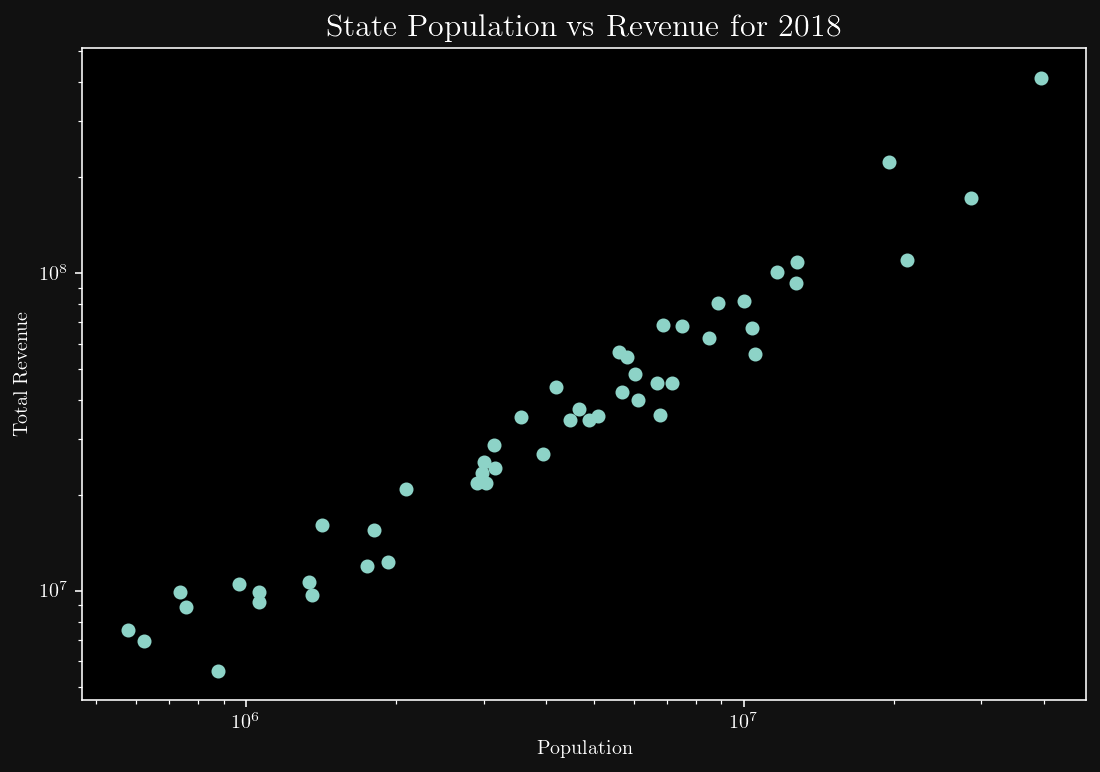

In [278]:
plt.scatter(merged2[2018], merged2['Amount'])
plt.title("State Population vs Revenue for 2018", fontsize=16)
plt.xlabel('Population')
plt.ylabel('Total Revenue')
plt.loglog()
plt.show()

In [279]:
merged1["Amount"] = pd.to_numeric(merged1['Amount'])

In [285]:
grouped1 = merged1.groupby(["Region", "Aggregate Description"]).mean()

In [286]:
grouped1.index

MultiIndex([(      'Alabama', 'Total Expenditure'),
            (      'Alabama',     'Total Revenue'),
            (      'Alabama',       'Total Taxes'),
            (       'Alaska', 'Total Expenditure'),
            (       'Alaska',     'Total Revenue'),
            (       'Alaska',       'Total Taxes'),
            (      'Arizona', 'Total Expenditure'),
            (      'Arizona',     'Total Revenue'),
            (      'Arizona',       'Total Taxes'),
            (     'Arkansas', 'Total Expenditure'),
            ...
            (   'Washington',       'Total Taxes'),
            ('West Virginia', 'Total Expenditure'),
            ('West Virginia',     'Total Revenue'),
            ('West Virginia',       'Total Taxes'),
            (    'Wisconsin', 'Total Expenditure'),
            (    'Wisconsin',     'Total Revenue'),
            (    'Wisconsin',       'Total Taxes'),
            (      'Wyoming', 'Total Expenditure'),
            (      'Wyoming',     'Total Revenue

In [ ]:
grouped1.index = grouped1.index.to_flat_index()

### Where to go from here with pandas

Check out the user guide, linked at the top. One thing that pandas is super helpful for is IO - reading different files. Pandas can read all sorts of things including excel files which is often helpful. Also we barely scrated the surface of what a groupby can do. The PDSH has a few examples but the users manual is where all the nittyg gritty lives.

Also, take a stab at loading your lab data into pandas. See if you like it more than using numpy arrays, I tend to find that the less mathy the data is, the more useful pandas is.

### Next week: Scikit Learn

Scikit learn is an awesome library for "traditional" machine learning in python (basically not neural networks). It has a lot of different methods so we can only talk about one or two of my favorites but check out [PDSH](https://jakevdp.github.io/PythonDataScienceHandbook/index.html#5.-Machine-Learning) for a handful of examples. The [User Guide](https://scikit-learn.org/stable/user_guide.html) is also exceptional. It simultaneously documentation and a decent repository for learning ML. 

### Future weeks

I'm not going to prepare any more of these notebooks after next week unless there is a lot of demand. I will plan to do twice weekly office hours (Tuesday and Thursdays 4-5 pm). If there is something you want to learn (like more scikit-learn applications or advanced topics in scipy for instance) email me! If there is consensus I'll make a notebook if not we can plan to discuss it in office hours. 
